In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from math import floor
from random import sample
import warnings
import time

sns.set(color_codes=True)

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
#%pylab inline
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
%run ./CVGI_MR_00_functions.ipynb

Populating the interactive namespace from numpy and matplotlib


In [3]:
imports()

What is the source of the MOVEMENT data? (1=internet, 2=home Mac, 3=office Windows) 2
What type of import is it? (1 = initial (only cases and movement), 2 = initial (full), 3 = data by week, 4 = merged datasets, 5 = merged and cleaned) 5



../../../02 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185852 entries, 0 to 1185851
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1185852 non-null  object 
 1   GADM_GID_2       1185852 non-null  object 
 2   mun_name         1185852 non-null  object 
 3   movement_change  1185852 non-null  float64
 4   stay_put         1185852 non-null  float64
 5   epi_week         1185852 non-null  object 
 6   ibge_code        1185852 non-null  int64  
 7   pop_2020         1185852 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 72.4+ MB

+++++++++++++++++Movement Range, by epidemiological week+++++++++++++++++
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 308035 entries, 0 to 308034
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ibge_code       308035 n

In [5]:
movement

,date,GADM_GID_2,mun_name,movement_change,stay_put,epi_week,ibge_code,pop_2020
0,2020-03-16,BRA.1.10_1,Mâncio Lima,-0.07328,0.15871,12.2020,1200336,19311
1,2020-03-17,BRA.1.10_1,Mâncio Lima,-0.13107,0.19191,12.2020,1200336,19311
2,2020-03-18,BRA.1.10_1,Mâncio Lima,-0.13968,0.24408,12.2020,1200336,19311
3,2020-03-19,BRA.1.10_1,Mâncio Lima,-0.19497,0.22831,12.2020,1200336,19311
4,2020-03-20,BRA.1.10_1,Mâncio Lima,-0.17284,0.23945,12.2020,1200336,19311
...,...,...,...,...,...,...,...,...
1185847,2021-04-07,BRA.9.98_1,Guapó,-0.10361,0.27132,14.2021,5209200,14207
1185848,2021-04-08,BRA.9.98_1,Guapó,-0.02995,0.22317,14.2021,5209200,14207
1185849,2021-04-09,BRA.9.98_1,Guapó,-0.04586,0.22991,14.2021,5209200,14207
1185850,2021-04-10,BRA.9.98_1,Guapó,0.04153,0.23159,14.2021,5209200,14207


In [6]:
cases

,ibge_code,epi_week,acc_cases,acc_deaths,new_cases,new_deaths,pop_2019,epi_week_col,acc_cases_100k,acc_deaths_1mi,epi_week_date
0,1100015,2020.18,1,0,1,0,22945.0,2020.18,4.36,0.00,2020-05-10
1,1100015,2020.19,8,0,0,0,22945.0,2020.19,34.87,0.00,2020-05-17
2,1100015,2020.20,7,0,0,0,22945.0,2020.20,30.51,0.00,2020-05-24
3,1100015,2020.21,13,0,3,0,22945.0,2020.21,56.66,0.00,2020-05-31
4,1100015,2020.22,21,0,-1,0,22945.0,2020.22,91.52,0.00,2020-06-07
...,...,...,...,...,...,...,...,...,...,...,...
308030,5300108,2021.17,2316597,49512,6624,263,3015268.0,2021.17,76828.89,16420.43,2021-05-02
308031,5300108,2021.18,2358003,51165,5390,237,3015268.0,2021.18,78202.10,16968.64,2021-05-09
308032,5300108,2021.19,2396055,52654,5311,185,3015268.0,2021.19,79464.08,17462.46,2021-05-16
308033,5300108,2021.20,2433365,53799,5337,142,3015268.0,2021.20,80701.45,17842.20,2021-05-23


In [49]:
svi_mhdi

,city_name,UF,ibge_cod,GADM_GID_2,pop_2020,MHDI_tot,MHDI_long,MHDI_edu,MHDI_inc,MHDI_pct_rank,SVI_tot,SVI_inf,SVI_hum,SVI_wrk,SVI_pct_rank,reg
0,Fernando Falcão/MA,MA,2104081,BRA.10.71_1,10460,0.443,0.417,0.728,0.286,0.000,0.784,0.782,0.742,0.827,1.000,2
1,Amapá do Maranhão/MA,MA,2100550,BRA.10.10_1,7005,0.520,0.503,0.688,0.406,0.018,0.773,0.987,0.716,0.616,0.999,2
2,Aveiro/PA,PA,1501006,BRA.14.14_1,16404,0.541,0.470,0.748,0.450,0.043,0.769,0.974,0.576,0.758,0.999,1
3,Humberto de Campos/MA,MA,2105005,BRA.10.86_1,28932,0.535,0.443,0.759,0.455,0.035,0.764,1.000,0.632,0.659,0.999,2
4,Icatu/MA,MA,2105104,BRA.10.87_1,27269,0.546,0.475,0.727,0.472,0.053,0.759,1.000,0.604,0.672,0.999,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,Arroio do Meio/RS,RS,4301008,BRA.21.19_1,20967,0.769,0.750,0.860,0.706,0.955,0.102,0.005,0.172,0.130,0.000,4
5561,Westfália/RS,RS,4323770,NaN,3031,0.752,0.796,0.849,0.630,0.905,0.102,0.006,0.170,0.131,0.000,4
5562,Nova Araçá/RS,RS,4312807,BRA.21.256_1,4826,0.785,0.796,0.843,0.722,0.982,0.099,0.000,0.167,0.129,0.000,4
5563,Timbó/SC,SC,4218202,BRA.24.271_1,44977,0.784,0.807,0.856,0.697,0.980,0.099,0.010,0.171,0.115,0.000,4


---

generating population data from the aggregate for one state in Brazil (let's pick RO, whichi is smaller)

In [4]:
%run ./CVGI_FB_functions.ipynb

code for one city, generates index from total deaths in that city

implementing as a function to be iterated for more cities

In [8]:
def events_cities(cases):
    start_time = time.time()
    total_deaths = 0
    for id_wk, val_wk in enumerate(cases.epi_week):
        #check if there are any cases, otherwise skip
        var_deaths = cases[(cases.epi_week == val_wk)].new_deaths.tolist()[0]
        #check if the death number of a city is positive. we are ignoring the negative numbers.
        if var_deaths > 0: total_deaths = total_deaths + var_deaths
    events = pd.DataFrame({'event': pd.Series([], dtype='int'),'week':pd.Series([], dtype='int')}, index=range(total_deaths))
    c = 0
    for id_wk, val_wk in enumerate(cases.epi_week):
        #check if there are any cases, otherwise skip
        var_deaths = cases[(cases.epi_week == val_wk)].new_deaths.tolist()[0]
        #ignore negative death numbers (they are low, and apply to very few cases, see if this needs to be improved)
        if var_deaths > 0:
            for i in range(var_deaths):
                events['event'].iloc[c] = 1 
                events['week'].iloc[c] = id_wk
                c = c + 1
    t1 = "--- %s seconds ---" % (time.time() - start_time)
    return events

Preparing function to iterate through the a state's city

In [9]:
def events_uf(uf = '11'):
    #uf is a string! don't forget
    cases_uf = cases[(cases['ibge_code'].str.startswith(uf)) & (cases['epi_week_date'] < ('2021-02-25'))]
    unique_cities = cases_uf.ibge_code.unique()
    dict_events_uf = {}
    
    for ibge_code in unique_cities:
        cases_test = cases[cases.ibge_code == ibge_code][['epi_week','new_deaths']]
        dict_events_uf[ibge_code] = events_cities(cases_test)
    #function returns a dict, it can be transformed in a dataframe using concat
    df_events = pd.concat(dict_events_uf)
    return df_events

In [10]:
events_sp = events_uf('35')
events_sp

event  week
3500105 0     1.0   6.0
        1     1.0   7.0
        2     1.0   9.0
        3     1.0  12.0
        4     1.0  12.0
...           ...   ...
3557303 20    1.0  55.0
        21    1.0  57.0
        22    1.0  58.0
        23    1.0  58.0
        24    1.0  59.0

[107885 rows x 2 columns]

In [11]:
#checking if the created dataframe has the same number of rows as number of deaths
uf = '35'
cases[(cases['ibge_code'].str.startswith(uf)) & (cases['epi_week_date'] < ('2021-02-25'))].new_deaths.sum()

57743

In [12]:
#getting one city '3500105' and then '3557303'
cases[cases['ibge_code'] == '3500105'].new_deaths.sum()

75

In [13]:
events_sp.loc['3557303'].event.sum()

25.0

In [14]:
#listing the cities
cities_list_svi_A5 = ['1501808','2111201','2910800','2403251','4218707']
#creating a dict between city names and ibge_code
cities_names_svi_A5_dict = {'1501808':'Breves/PA','2111201':'São José de Ribamar/MA','2910800':'Feira de Santana/BA','2403251':'Parnamirim/RN','4218707':'Tubarão/SC'}
events_svi_A5 = events_mc(cities_list_svi_A5)
events_svi_A5

event  week
1501808 0      1.0   0.0
        1      1.0   1.0
        2      1.0   1.0
        3      1.0   1.0
        4      1.0   1.0
...            ...   ...
4218707 370    1.0  61.0
        371    1.0  62.0
        372    1.0  62.0
        373    1.0  62.0
        374    1.0  62.0

[1950 rows x 2 columns]

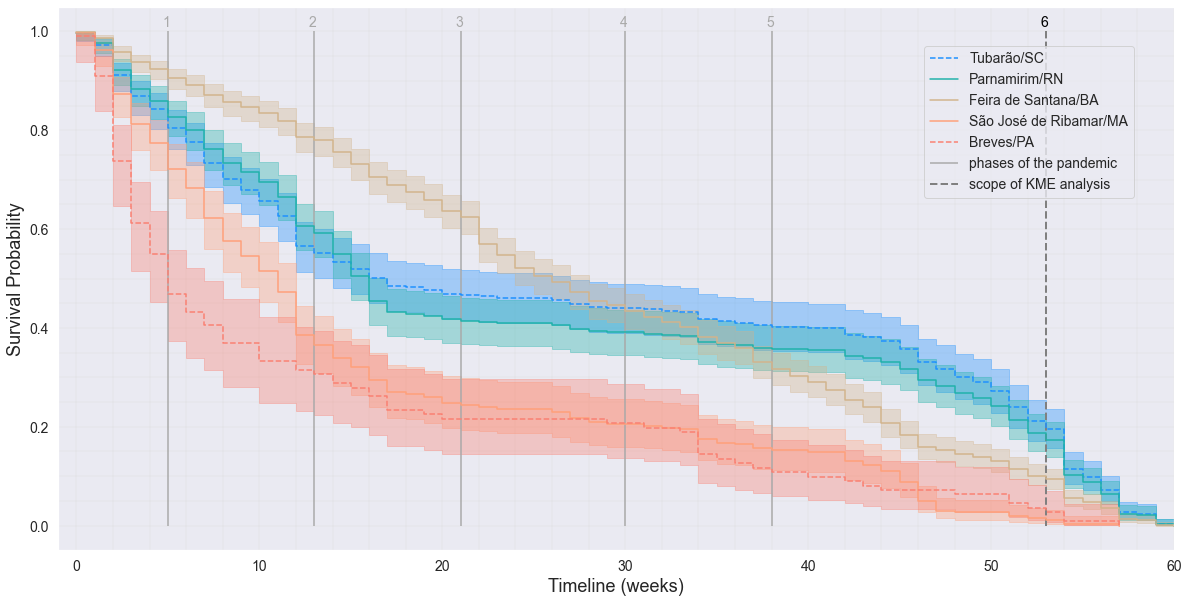

In [15]:
kmf = KaplanMeierFitter() 
df = events_svi_A5
cities_list = cities_list_svi_A5
T = df['week']     ## time to event
E = df['event']      ## event occurred or censored

save_fig = True
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('tab10') #viridis
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 14
ms = 18
ls = 24
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ls)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,ax = plt.subplots(figsize=(20,10))#,gridspec_kw=dict(right=0.9)

cities_label1 = '4218707'
ix1 = df.loc[cities_label1].index
kmf.fit(T[ix1], E[ix1], label=cities_names_svi_A5_dict[cities_label1]) 
ax = kmf.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[0],ls=lineStyles[0])

cities_label2 = '2403251'
ix2 = df.loc[cities_label2].index
kmf.fit(T[ix2], E[ix2], label=cities_names_svi_A5_dict[cities_label2]) 
ax2 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[1],ls=lineStyles[1])

cities_label3 = '2910800'
ix3 = df.loc[cities_label3].index
kmf.fit(T[ix3], E[ix3], label=cities_names_svi_A5_dict[cities_label3]) 
ax3 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[2],ls=lineStyles[1])

cities_label4 = '2111201'
ix4 = df.loc[cities_label4].index
kmf.fit(T[ix4], E[ix4], label=cities_names_svi_A5_dict[cities_label4]) 
ax4 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[3],ls=lineStyles[1])

cities_label5 = '1501808'
ix5 = df.loc[cities_label5].index
kmf.fit(T[ix5], E[ix5], label=cities_names_svi_A5_dict[cities_label5]) 
ax4 = kmf.plot(ax=ax,ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[4],ls=lineStyles[0])

vlines_pos = [5,13,21,30,38]
ax.vlines(vlines_pos, 0, 1, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
for i in range(len(vlines_pos)):
    text((vlines_pos[i]-0.3),1.01,i+1,color='darkgrey')
ax.vlines([53], 0, 1, colors='grey',lw=2, linestyles='--', label='scope of KME analysis')
text(52.7,1.01,'6',color='black')
plt.legend(bbox_to_anchor=(0.77, 0.94), loc='upper left')
plt.minorticks_on()
plt.grid(b=True, which='both',color='gainsboro', linestyle='-', linewidth=0.4)

ax.set(xlabel='Timeline (weeks)', ylabel='Survival Probability',xlim=[-1,60])

if save_fig == True:
    file_name = 'CVGI_KME_SVI_cities_sample_A5.png'
    file_path = Path('./OUT/')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

testing KME with more than one city

In [18]:
svi_ibge_code = svi_mhdi.set_index('ibge_cod')
svi_ibge_code

,city_name,UF,GADM_GID_2,pop_2020,MHDI_tot,MHDI_long,MHDI_edu,MHDI_inc,MHDI_pct_rank,SVI_tot,SVI_inf,SVI_hum,SVI_wrk,SVI_pct_rank
ibge_cod,,,,,,,,,,,,,,
2104081,Fernando Falcão/MA,MA,BRA.10.71_1,10460,0.443,0.417,0.728,0.286,0.000,0.784,0.782,0.742,0.827,1.000
2100550,Amapá do Maranhão/MA,MA,BRA.10.10_1,7005,0.520,0.503,0.688,0.406,0.018,0.773,0.987,0.716,0.616,0.999
1501006,Aveiro/PA,PA,BRA.14.14_1,16404,0.541,0.470,0.748,0.450,0.043,0.769,0.974,0.576,0.758,0.999
2105005,Humberto de Campos/MA,MA,BRA.10.86_1,28932,0.535,0.443,0.759,0.455,0.035,0.764,1.000,0.632,0.659,0.999
2105104,Icatu/MA,MA,BRA.10.87_1,27269,0.546,0.475,0.727,0.472,0.053,0.759,1.000,0.604,0.672,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301008,Arroio do Meio/RS,RS,BRA.21.19_1,20967,0.769,0.750,0.860,0.706,0.955,0.102,0.005,0.172,0.130,0.000
4323770,Westfália/RS,RS,NaN,3031,0.752,0.796,0.849,0.630,0.905,0.102,0.006,0.170,0.131,0.000
4312807,Nova Araçá/RS,RS,BRA.21.256_1,4826,0.785,0.796,0.843,0.722,0.982,0.099,0.000,0.167,0.129,0.000


In [19]:
#selecting a sample of 15 top cities
sp_top15_SVI_list = svi_ibge_code['SVI_tot'].nlargest(n=15).index.tolist()
print(sp_top15_SVI_list)
events_sp_top15 = events_mc(sp_top15_SVI_list)
events_sp_top15

['2104081', '2100550', '1501006', '2105005', '2105104', '2110278', '1303700', '1506005', '1302306', '1508308', '2108256', '2101301', '1500305', '2103125', '1301605']


event  week
2104081 0     1.0  29.0
2100550 0     1.0  49.0
        1     1.0  50.0
        2     1.0  53.0
        3     1.0  53.0
...           ...   ...
1301605 31    1.0  51.0
        32    1.0  52.0
        33    1.0  53.0
        34    1.0  53.0
        35    1.0  53.0

[279 rows x 2 columns]

In [20]:
#selecting a sample of 15 bottom cities
sp_low15_SVI_list = svi_ibge_code['SVI_tot'].nsmallest(n=15).index.tolist()
events_sp_low15 = events_mc(sp_low15_SVI_list)
events_sp_low15

event  week
4210035 0     1.0  15.0
        1     1.0  37.0
        2     1.0  38.0
        3     1.0  44.0
        4     1.0  45.0
...           ...   ...
4313201 47    1.0  48.0
        48    1.0  49.0
        49    1.0  49.0
        50    1.0  50.0
        51    1.0  51.0

[247 rows x 2 columns]

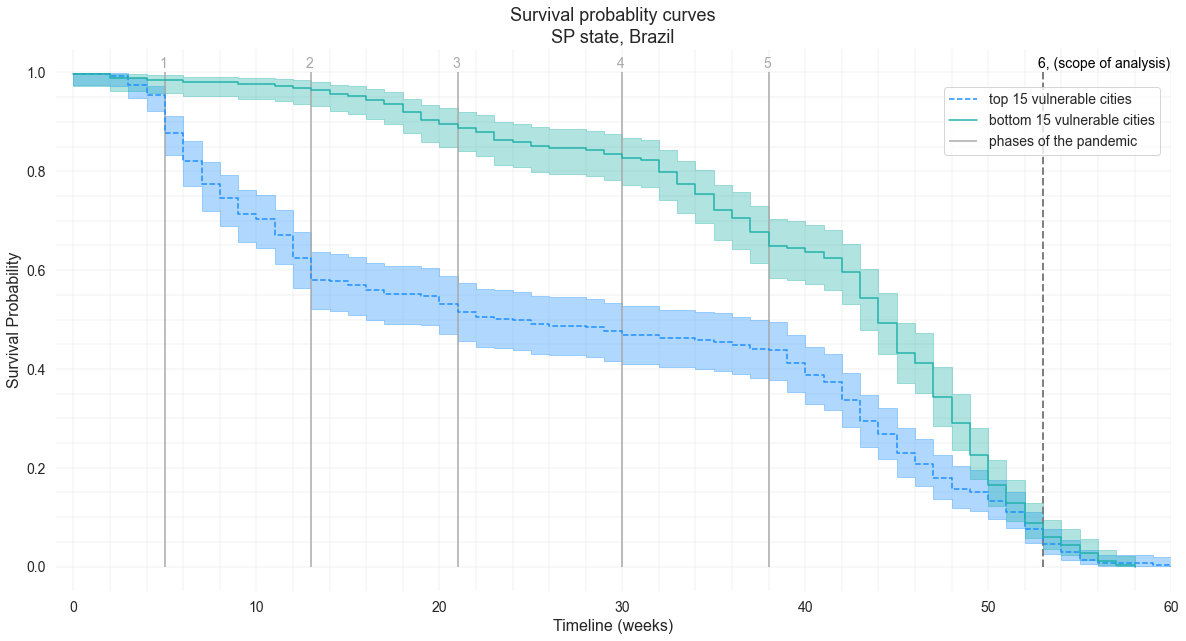

In [45]:
save_fig = False
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('viridis') # tab10
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 14
ms = 16
ls = 18
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ls)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,ax = plt.subplots(figsize=(20,10))#,gridspec_kw=dict(right=0.9)

vlines_pos = [5,13,21,30,38]
ax.vlines(vlines_pos, 0, 1, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
for i in range(len(vlines_pos)):
    text((vlines_pos[i]-0.3),1.01,i+1,color='darkgrey')
ax.vlines([53], 0, 1, colors='grey',lw=2, linestyles='--') #, label='scope of KME analysis'
ax.set_facecolor((1, 1,1))

text(52.7,1.01,'6, (scope of analysis)',color='black')
plt.minorticks_on()
plt.grid(b=True, which='both',color='gainsboro', linestyle='-', linewidth=0.4)

#fitting for all 15 cities at the same time
kmf_ext1 = KaplanMeierFitter() 
df1 = events_sp_top15

T1 = df1['week']     ## time to event
E1 = df1['event']      ## event occurred or censored

kmf_ext1.fit(T1, E1, label='top 15 vulnerable cities')    ## fit the cohort 1 data label=cities_list[i]
kmf_ext1.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[0],ls=lineStyles[0])

kmf_ext2 = KaplanMeierFitter() 
df2 = events_sp_low15

T2 = df2['week']     ## time to event
E2 = df2['event']      ## event occurred or censored

kmf_ext2.fit(T2, E2, label='bottom 15 vulnerable cities')    ## fit the cohort 1 data label=cities_list[i]
kmf_ext2.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[1],ls=lineStyles[1]) #show_censors=True

plt.setp(ax.get_xticklabels(), rotation = 0)
plt.legend(bbox_to_anchor=(0.79, 0.94), loc='upper left', facecolor='white') #
ax.set(title = "Survival probablity curves\nSP state, Brazil", xlabel='Timeline (weeks)', ylabel='Survival Probability',xlim=[-1,60])

plt.show()


if save_fig == True:
    file_name = 'CVGI_KME_SVI_cities_sample_B1.png'
    file_path = Path('./OUT/')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

---

<h3> Slicing the dataset according to vulnerability</h3>

In [48]:
svi_mhdi['reg'] = svi_mhdi.ibge_cod.str[0]
svi_mhdi

,city_name,UF,ibge_cod,GADM_GID_2,pop_2020,MHDI_tot,MHDI_long,MHDI_edu,MHDI_inc,MHDI_pct_rank,SVI_tot,SVI_inf,SVI_hum,SVI_wrk,SVI_pct_rank,reg
0,Fernando Falcão/MA,MA,2104081,BRA.10.71_1,10460,0.443,0.417,0.728,0.286,0.000,0.784,0.782,0.742,0.827,1.000,2
1,Amapá do Maranhão/MA,MA,2100550,BRA.10.10_1,7005,0.520,0.503,0.688,0.406,0.018,0.773,0.987,0.716,0.616,0.999,2
2,Aveiro/PA,PA,1501006,BRA.14.14_1,16404,0.541,0.470,0.748,0.450,0.043,0.769,0.974,0.576,0.758,0.999,1
3,Humberto de Campos/MA,MA,2105005,BRA.10.86_1,28932,0.535,0.443,0.759,0.455,0.035,0.764,1.000,0.632,0.659,0.999,2
4,Icatu/MA,MA,2105104,BRA.10.87_1,27269,0.546,0.475,0.727,0.472,0.053,0.759,1.000,0.604,0.672,0.999,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,Arroio do Meio/RS,RS,4301008,BRA.21.19_1,20967,0.769,0.750,0.860,0.706,0.955,0.102,0.005,0.172,0.130,0.000,4
5561,Westfália/RS,RS,4323770,NaN,3031,0.752,0.796,0.849,0.630,0.905,0.102,0.006,0.170,0.131,0.000,4
5562,Nova Araçá/RS,RS,4312807,BRA.21.256_1,4826,0.785,0.796,0.843,0.722,0.982,0.099,0.000,0.167,0.129,0.000,4
5563,Timbó/SC,SC,4218202,BRA.24.271_1,44977,0.784,0.807,0.856,0.697,0.980,0.099,0.010,0.171,0.115,0.000,4


In [81]:
rows = ['NO','NE','SE','SO','CW','BR']
cols = ['min','25','50','75','max']
svi_reg = pd.DataFrame(columns=cols,index=rows)
svi_reg

,min,25,50,75,max
NO,NaN,NaN,NaN,NaN,NaN
NE,NaN,NaN,NaN,NaN,NaN
SE,NaN,NaN,NaN,NaN,NaN
SO,NaN,NaN,NaN,NaN,NaN
CW,NaN,NaN,NaN,NaN,NaN
BR,NaN,NaN,NaN,NaN,NaN


In [82]:
#checking each region for its SVI quantiles
for i in range(len(svi_reg.index)):
    svi_reg.iloc[i]['min'] = svi_mhdi[svi_mhdi.reg == str(i+1)].SVI_tot.min()
    svi_reg.iloc[i]['25'] = svi_mhdi[svi_mhdi.reg == str(i+1)].SVI_tot.quantile(q=.25)
    svi_reg.iloc[i]['50'] = svi_mhdi[svi_mhdi.reg == str(i+1)].SVI_tot.quantile(q=.50)
    svi_reg.iloc[i]['75'] = svi_mhdi[svi_mhdi.reg == str(i+1)].SVI_tot.quantile(q=.75)
    svi_reg.iloc[i]['max'] = svi_mhdi[svi_mhdi.reg == str(i+1)].SVI_tot.max()
svi_reg

,min,25,50,75,max
NO,0.21,0.383,0.474,0.565,0.769
NE,0.104,0.412,0.463,0.51675,0.784
SE,0.113,0.22,0.268,0.329,0.653
SO,0.09,0.194,0.24,0.289,0.568
CW,0.141,0.252,0.295,0.346,0.601
BR,NaN,NaN,NaN,NaN,NaN


In [84]:
svi_reg.loc['BR']['min'] = svi_mhdi.SVI_tot.min()
svi_reg.loc['BR']['25'] = svi_mhdi.SVI_tot.quantile(q=.25)
svi_reg.loc['BR']['50'] = svi_mhdi.SVI_tot.quantile(q=.50)
svi_reg.loc['BR']['75'] = svi_mhdi.SVI_tot.quantile(q=.75)
svi_reg.loc['BR']['max'] = svi_mhdi.SVI_tot.max()
svi_reg

,min,25,50,75,max
NO,0.21,0.383,0.474,0.565,0.769
NE,0.104,0.412,0.463,0.51675,0.784
SE,0.113,0.22,0.268,0.329,0.653
SO,0.09,0.194,0.24,0.289,0.568
CW,0.141,0.252,0.295,0.346,0.601
BR,0.09,0.246,0.335,0.448,0.784


In [87]:
svi_br_75_max_list = svi_mhdi[svi_mhdi.SVI_tot >= svi_reg.loc['BR']['75']].ibge_cod.to_list()
svi_br_75_50_list = svi_mhdi[(svi_mhdi.SVI_tot < svi_reg.loc['BR']['75']) & (svi_mhdi.SVI_tot >= svi_reg.loc['BR']['50'])].ibge_cod.to_list()
svi_br_50_25_list = svi_mhdi[(svi_mhdi.SVI_tot < svi_reg.loc['BR']['50']) & (svi_mhdi.SVI_tot >= svi_reg.loc['BR']['25'])].ibge_cod.to_list()
svi_br_25_min_list = svi_mhdi[(svi_mhdi.SVI_tot < svi_reg.loc['BR']['25'])].ibge_cod.to_list()
print(len(svi_br_75_max_list), len(svi_br_75_50_list), len(svi_br_50_25_list), len(svi_br_25_min_list))

1396 1387 1405 1377


Fitting multiple ranges of vulnerabilities: from max to 75%, 75-50%, 50-25%, and 25% to min.

Generating each of the dataframes for BR, it is taking some time for each of them to go through the events_mc function

In [67]:
%%time
df_br_75_max = events_mc(svi_br_75_max_list)
df_br_75_50 = events_mc(svi_br_75_50_list)
df_br_50_25 = events_mc(svi_br_50_25_list)
df_br_25_min = events_mc(svi_br_25_min_list)

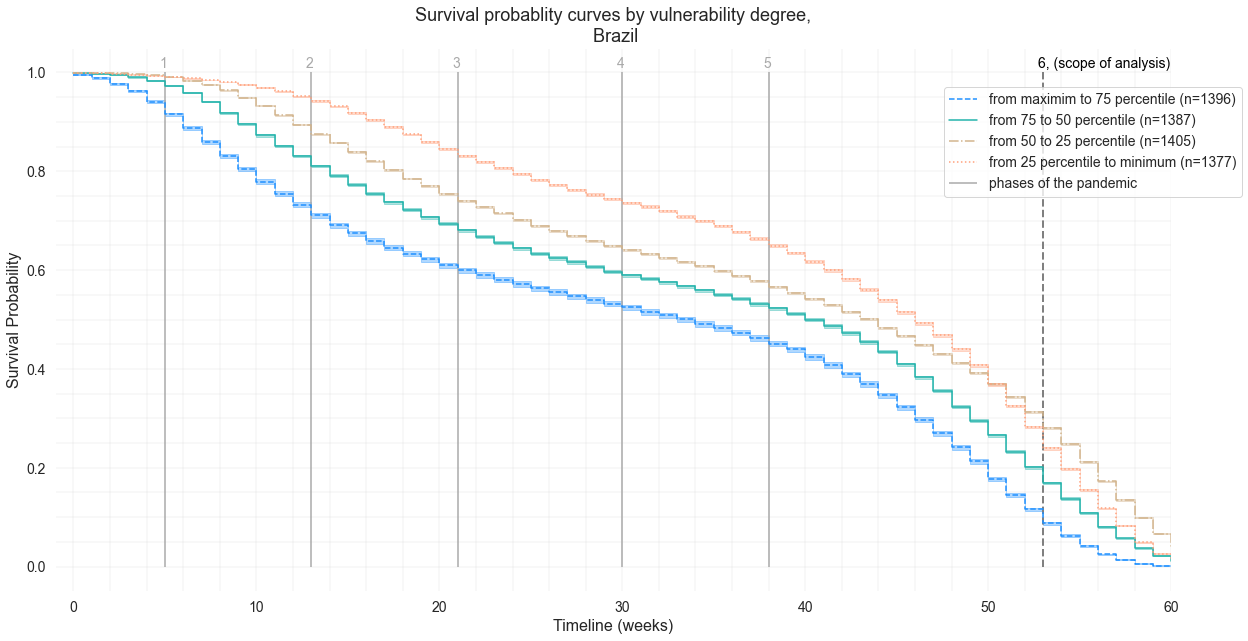

In [339]:
save_fig = True
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('viridis') # tab10
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 14
ms = 16
ls = 18
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ls)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,ax = plt.subplots(figsize=(20,10))#,gridspec_kw=dict(right=0.9)

vlines_pos = [5,13,21,30,38]
ax.vlines(vlines_pos, 0, 1, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
for i in range(len(vlines_pos)):
    text((vlines_pos[i]-0.3),1.01,i+1,color='darkgrey')
ax.vlines([53], 0, 1, colors='grey',lw=2, linestyles='--') #, label='scope of KME analysis'
ax.set_facecolor((1, 1,1))

text(52.7,1.01,'6, (scope of analysis)',color='black')
plt.minorticks_on()
plt.grid(b=True, which='both',color='gainsboro', linestyle='-', linewidth=0.4)

#fitting for allcities at the same time
kmf_ext1 = KaplanMeierFitter() 
df1 = df_br_75_max

T1 = df1['week']     ## time to event
E1 = df1['event']      ## event occurred or censored
label1 = 'from maximim to 75 percentile (n='+str(len(svi_br_75_max_list))+')'

kmf_ext1.fit(T1, E1, label=label1)    ## fit the cohort 1 data label=cities_list[i]
kmf_ext1.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[0],ls=lineStyles[0])


kmf_ext2 = KaplanMeierFitter() 
df2 = df_br_75_50

T2 = df2['week']     ## time to event
E2 = df2['event']      ## event occurred or censored
label2 = 'from 75 to 50 percentile (n='+str(len(svi_br_75_50_list))+')'

kmf_ext2.fit(T2, E2, label=label2)    ## fit the cohort 1 data label=cities_list[i]
kmf_ext2.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[1],ls=lineStyles[1]) #show_censors=True

kmf_ext3 = KaplanMeierFitter() 
df3 = df_br_50_25

T3 = df3['week']     ## time to event
E3 = df3['event']      ## event occurred or censored
label3 = 'from 50 to 25 percentile (n='+str(len(svi_br_50_25_list))+')'

kmf_ext3.fit(T3, E3, label=label3)    ## fit the cohort 1 data label=cities_list[i]
kmf_ext3.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[2],ls=lineStyles[2]) #show_censors=True

kmf_ext4 = KaplanMeierFitter() 
df4 = df_br_25_min

T4 = df4['week']     ## time to event
E4 = df4['event']      ## event occurred or censored
label4 = 'from 25 percentile to minimum (n='+str(len(svi_br_25_min_list))+')'

kmf_ext4.fit(T4, E4, label=label4)    ## fit the cohort 1 data label=cities_list[i]
kmf_ext4.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[3],ls=lineStyles[3]) #show_censors=True

plt.setp(ax.get_xticklabels(), rotation = 0)
plt.legend(bbox_to_anchor=(0.79, 0.94), loc='upper left', facecolor='white') #
ax.set(title = "Survival probablity curves by vulnerability degree,\n Brazil", xlabel='Timeline (weeks)', ylabel='Survival Probability',xlim=[-1,60])

if save_fig == True:
    file_name = 'CVGI_KME_SVI_cities_sample_B1.png'
    file_path = Path('./OUT/')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

In [88]:
svi_reg

,min,25,50,75,max
NO,0.21,0.383,0.474,0.565,0.769
NE,0.104,0.412,0.463,0.51675,0.784
SE,0.113,0.22,0.268,0.329,0.653
SO,0.09,0.194,0.24,0.289,0.568
CW,0.141,0.252,0.295,0.346,0.601
BR,0.09,0.246,0.335,0.448,0.784


In [130]:
dict_reg = {'NO':'1','NE':'2','SE':'3','SO':'4','CW':'5'}
def svi_lists(reg_75_max, reg__75_50, reg__50_25, reg_25_min):  
    rg = str(left(reg_75_max, 2))
    #print(reg)
    reg_75_max = svi_mhdi[(svi_mhdi.reg == dict_reg[rg]) & (svi_mhdi.SVI_tot >= svi_reg.loc[rg]['75'])].ibge_cod.to_list()
    reg__75_50 = svi_mhdi[(svi_mhdi.reg == dict_reg[rg]) & (svi_mhdi.SVI_tot < svi_reg.loc[rg]['75']) & (svi_mhdi.SVI_tot >= svi_reg.loc[rg]['50'])].ibge_cod.to_list()
    reg__50_25 = svi_mhdi[(svi_mhdi.reg == dict_reg[rg]) & (svi_mhdi.SVI_tot < svi_reg.loc[rg]['50']) & (svi_mhdi.SVI_tot >= svi_reg.loc[rg]['25'])].ibge_cod.to_list()
    reg_25_min = svi_mhdi[(svi_mhdi.reg == dict_reg[rg]) & (svi_mhdi.SVI_tot < svi_reg.loc[rg]['25'])].ibge_cod.to_list()
    print(len(reg_75_max), len(reg__75_50), len(reg__50_25), len(reg_25_min))
    return reg_75_max, reg__75_50, reg__50_25, reg_25_min

# I could probably add a dictionary here to call the n of each list later

In [137]:
NO_75_max, NO_75_50, NO_50_25, NO_25_min = svi_lists('NO_75_max', 'NO_75_50', 'NO_50_25', 'NO_25_min')

114 112 114 109


In [138]:
%%time
df_NO_75_max = events_mc(NO_75_max)
df_NO_75_50 = events_mc(NO_75_50)
df_NO_50_25 = events_mc(NO_50_25)
df_NO_25_min = events_mc(NO_25_min)

CPU times: user 30.1 s, sys: 71.8 ms, total: 30.2 s
Wall time: 30.2 s


In [140]:
NE_75_max, NE_75_50, NE_50_25, NE_25_min = svi_lists('NE_75_max', 'NE_75_50', 'NE_50_25', 'NE_25_min')

449 457 445 443


In [141]:
%%time
df_NE_75_max = events_mc(NE_75_max)
df_NE_75_50 = events_mc(NE_75_50)
df_NE_50_25 = events_mc(NE_50_25)
df_NE_25_min = events_mc(NE_25_min)

CPU times: user 1min 50s, sys: 196 ms, total: 1min 50s
Wall time: 1min 50s


In [148]:
SE_75_max, SE_75_50, SE_50_25, SE_25_min = svi_lists('SE_75_max', 'SE_75_50', 'SE_50_25', 'SE_25_min')

421 423 416 408


In [149]:
%%time
df_SE_75_max = events_mc(SE_75_max)
df_SE_75_50 = events_mc(SE_75_50)
df_SE_50_25 = events_mc(SE_50_25)
df_SE_25_min = events_mc(SE_25_min)

CPU times: user 1min 58s, sys: 255 ms, total: 1min 58s
Wall time: 1min 58s


In [150]:
SO_75_max, SO_75_50, SO_50_25, SO_25_min = svi_lists('SO_75_max', 'SO_75_50', 'SO_50_25', 'SO_25_min')

299 296 297 296


In [151]:
%%time
df_SO_75_max = events_mc(SO_75_max)
df_SO_75_50 = events_mc(SO_75_50)
df_SO_50_25 = events_mc(SO_50_25)
df_SO_25_min = events_mc(SO_25_min)

CPU times: user 1min 12s, sys: 127 ms, total: 1min 13s
Wall time: 1min 13s


In [152]:
CW_75_max, CW_75_50, CW_50_25, CW_25_min = svi_lists('CW_75_max', 'CW_75_50', 'CW_50_25', 'CW_25_min')

118 119 113 116


In [153]:
%%time
df_CW_75_max = events_mc(CW_75_max)
df_CW_75_50 = events_mc(CW_75_50)
df_CW_50_25 = events_mc(CW_50_25)
df_CW_25_min = events_mc(CW_25_min)

CPU times: user 30.1 s, sys: 55.8 ms, total: 30.1 s
Wall time: 30.1 s


OK, fixed the iteration in the df dictionary, below. 

In [258]:
svi_reg.index

Index(['NO', 'NE', 'SE', 'SO', 'CW', 'BR'], dtype='object')

In [259]:
range(len(svi_reg.index)-1)

range(0, 5)

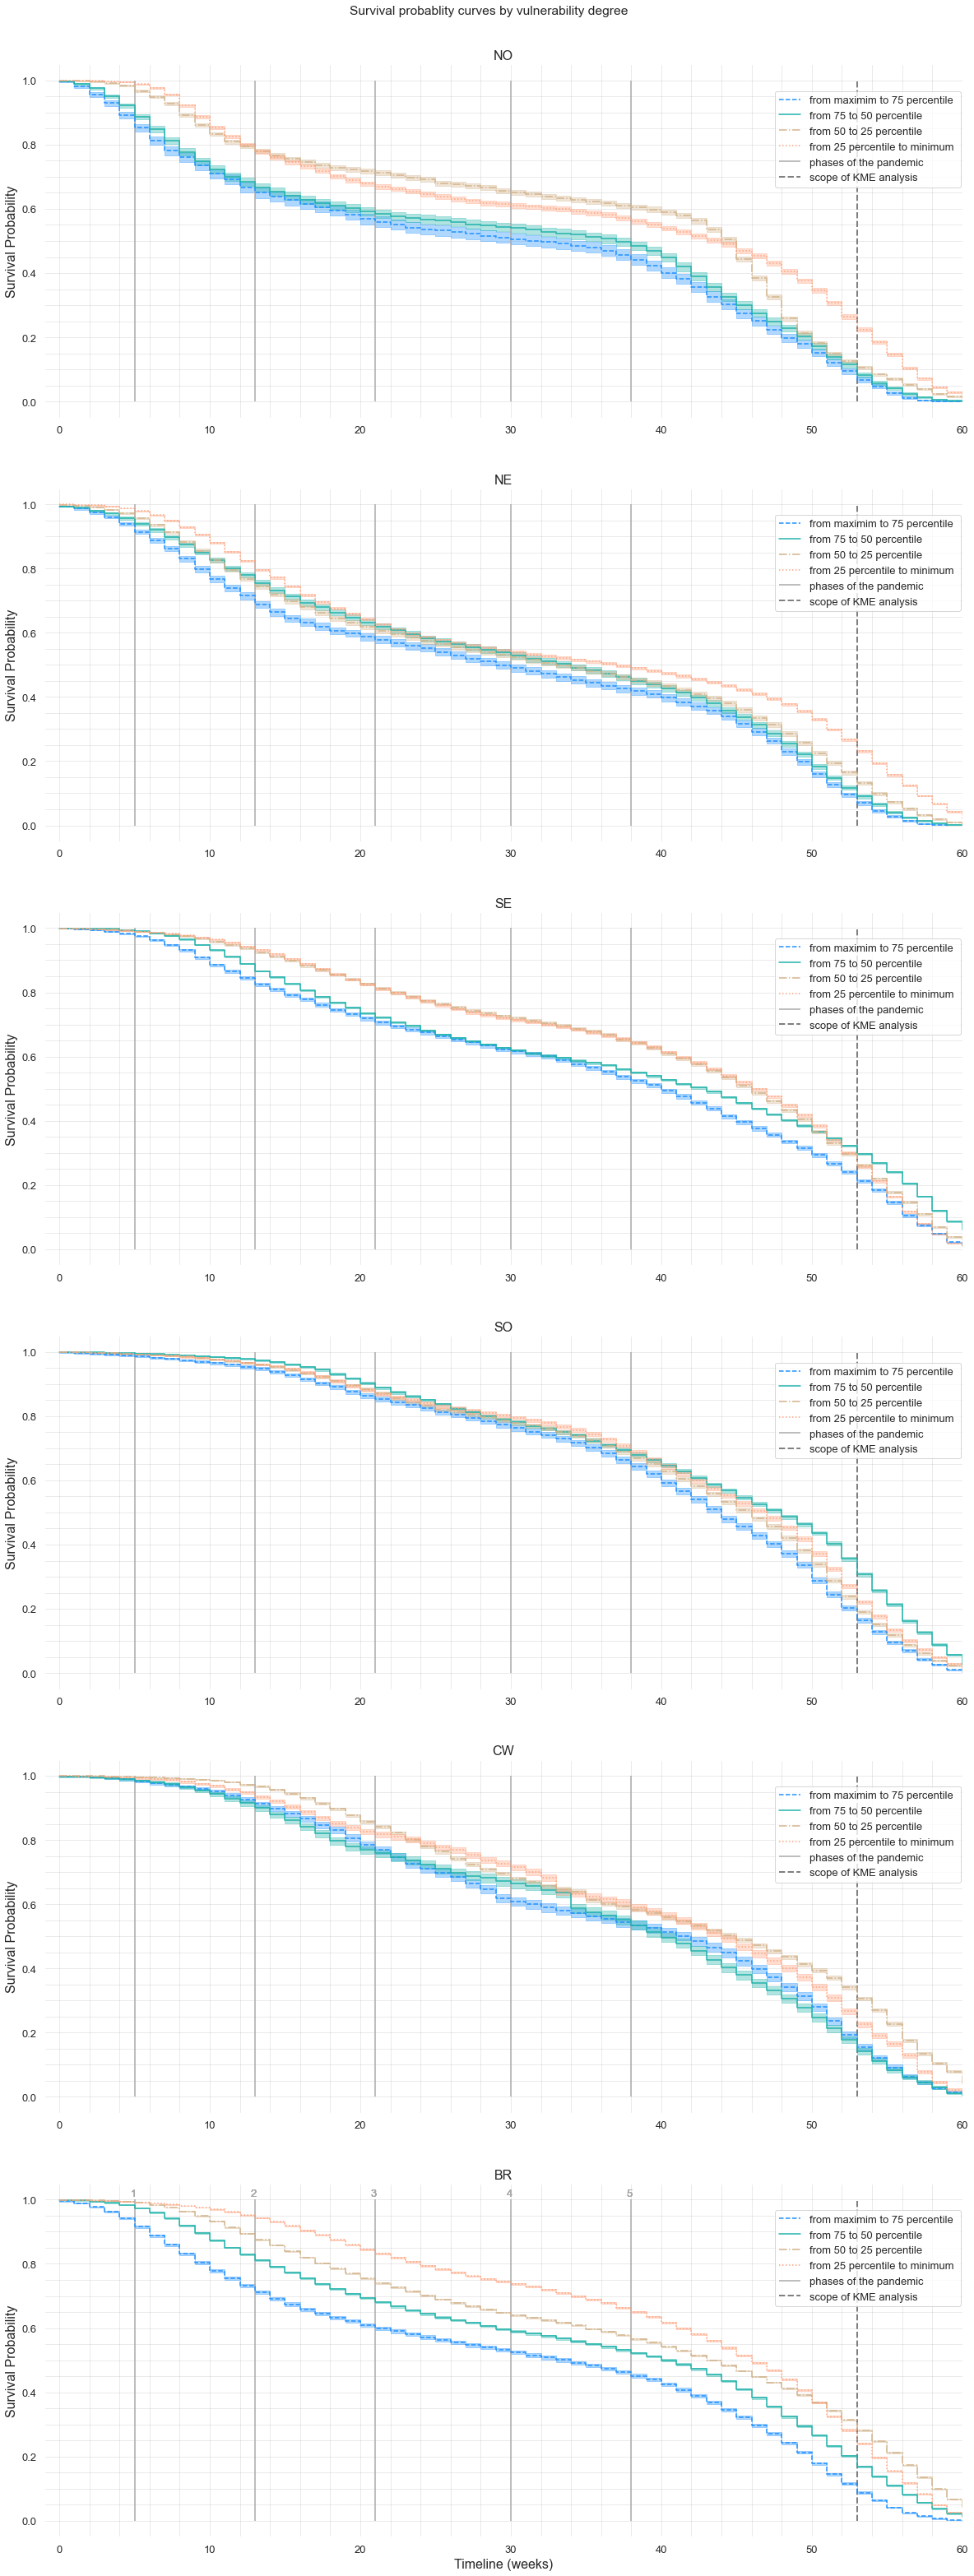

In [337]:
save_fig = True
ci_alpha_value = 0.35
lineStyles = ['--','-','-.',':']
cmap = matplotlib.cm.get_cmap('viridis') # tab10
color_list = ['dodgerblue','lightseagreen','tan','lightsalmon','salmon']
#setting font sizes
ss = 13
ms = 16
ls = 18
plt.rc('font', size=ss)          # controls default text sizes
plt.rc('axes', titlesize=ms)     # fontsize of the axes title
plt.rc('axes', labelsize=ms)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=ss)    # fontsize of the tick labels
plt.rc('ytick', labelsize=ss)    # fontsize of the tick labels
plt.rc('legend', fontsize=ss)    # legend fontsize
vlines_pos = [5,13,21,30,38]

fig,ax = plt.subplots(nrows=6, ncols=1, figsize=(20,50), squeeze=True, sharey=True)#,gridspec_kw=dict(right=0.9)
fig.suptitle('Survival probablity curves by vulnerability degree')
fig.subplots_adjust(top=0.96)

dict_df_lists = {'NO':[df_NO_75_max, df_NO_75_50, df_NO_50_25, df_NO_25_min],
                 'NE':[df_NE_75_max, df_NE_75_50, df_NE_50_25, df_NE_25_min],
                 'SE':[df_SE_75_max, df_SE_75_50, df_SE_50_25, df_SE_25_min],
                 'SO':[df_SO_75_max, df_SO_75_50, df_SO_50_25, df_SO_25_min],
                 'CW':[df_CW_75_max, df_CW_75_50, df_CW_50_25, df_CW_25_min],
                 'BR':[df_br_75_max, df_br_75_50, df_br_50_25, df_br_25_min]}

for i in range(len(svi_reg.index)):
    df1 = dict_df_lists[svi_reg.index[i]][0]
    df2 = dict_df_lists[svi_reg.index[i]][1]
    df3 = dict_df_lists[svi_reg.index[i]][2]
    df4 = dict_df_lists[svi_reg.index[i]][3]
    ii = i-1

    #fitting for allcities at the same time'''
    kmf_ext1 = KaplanMeierFitter() 
    T1 = df1['week']     ## time to event
    E1 = df1['event']      ## event occurred or censored
    label1 = 'from maximim to 75 percentile'  #(n='+str(len(svi_br_75_max_list))+')
    kmf_ext1.fit(T1, E1, label=label1)    #
    ax[i] = kmf_ext1.plot(ci_legend=True, ci_alpha=ci_alpha_value, color=color_list[0],ls=lineStyles[0], ax=ax[i]) #,ax=ax
    
    kmf_ext2 = KaplanMeierFitter() 
    T2 = df2['week']     ## time to event
    E2 = df2['event']      ## event occurred or censored
    label2 = 'from 75 to 50 percentile' #(n='+str(len(svi_br_75_50_list))+')
    kmf_ext2.fit(T2, E2, label=label2)    ## fit the cohort 1 data label=cities_list[i]
    ax[i] = kmf_ext2.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[1],ls=lineStyles[1], ax=ax[i]) #show_censors=True

    kmf_ext3 = KaplanMeierFitter() 
    T3 = df3['week']     ## time to event
    E3 = df3['event']      ## event occurred or censored
    label3 = 'from 50 to 25 percentile' # (n='+str(len(svi_br_50_25_list))+')
    kmf_ext3.fit(T3, E3, label=label3)    ## fit the cohort 1 data label=cities_list[i]
    ax[i] = kmf_ext3.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[2],ls=lineStyles[2], ax=ax[i]) #show_censors=True

    kmf_ext4 = KaplanMeierFitter() 
    T4 = df4['week']     ## time to event
    E4 = df4['event']      ## event occurred or censored
    label4 = 'from 25 percentile to minimum ' #(n='+str(len(svi_br_25_min_list))+')
    kmf_ext4.fit(T4, E4, label=label4)    ## fit the cohort 1 data label=cities_list[i]
    ax[i] = kmf_ext4.plot(ci_legend=True,ci_alpha=ci_alpha_value, color=color_list[3],ls=lineStyles[3], ax=ax[i]) #show_censors=True  
        
    ax[i].vlines(vlines_pos, 0, 1, colors='darkgrey',lw=1.5, linestyles='-', label='phases of the pandemic')
    ax[i].vlines([53], 0, 1, colors='grey',lw=2, linestyles='--', label='scope of KME analysis') #
    ax[i].legend(bbox_to_anchor=(0.79, 0.94), loc='upper left', facecolor='white') #
    ax[i].set_facecolor((1,1,1))
    ax[i].set(title = str(svi_reg.index[i]), xlabel='', ylabel='Survival Probability',xlim=[-1,60]) #,\n
    for i in range(len(vlines_pos)):
        text((vlines_pos[i]-0.3),1.01,i+1,color='darkgrey')

    for n in range(6):
        ax[n].grid(b=True, which='major', color='#999999', linestyle='-',alpha=0.2)
        ax[n].minorticks_on()
        ax[n].grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
    
    ax[5].set(xlabel='Timeline (weeks)')

if save_fig == True:
    file_name = 'CVGI_KME_SVI_cities_per_region_B2.png'
    file_path = Path('./OUT/')
    url = file_path / file_name
    plt.savefig(url, dpi=300,bbox_inches='tight',pad_inches=0.05,transparent=False, facecolor='w')

plt.show()